# Classificação de Diabetes

Este estudo visa introduzir, de forma iterativa e introdutória, como abordar o desenvolvimento de modelos de aprendizado de máquina supervisionado.

Os dados utilizados são compostos da base de dados de diabates indiano que pode ser baixado originalmente do [Kaggle](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).

## Importação das bibliotecas

As bibliotecas já estão todas instaladadas no ambiente Colab do Google. Não é necessário instalar nenhuma das que serão utilizadas.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Carregar e revisar dados
Os dados utilizados neste estudo são do banco de dados da Índia de diabetes, que podem ser baixados originalmente do [Kaggle](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).

Vamos baixar do nosso repositório para simplificar.

In [1]:
!git clone https://github.com/michelpf/machine-learning-101-pima/

Cloning into 'machine-learning-101-pima'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 6 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [2]:
%cd machine-learning-101-pima

/content/machine-learning-101-pima


In [5]:
df = pd.read_csv("./data/diabetes.csv")

Quantidade de linhas e colunas

In [6]:
df.shape

(768, 9)

Amostras de dados (5 primeiros)

In [ ]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Amostra de dados (5 últimos)

In [ ]:
df.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


| Feature | Descrição | Comentários |
|---------|-----------|------------|
| Pregnancies | Número de vezes que a pessoa ficou grávida |
| Glucose | Concentração de plasma de glicose de 2 horas a partir do teste oral de tolerância a glicose |
| BloodPressure | Pressão sanguínia diastólica (mm Hg) |
| SkinThickness | Espessura da pele do triceps (mm) |
| Insulin | Soro de insulina de 2 horas (mu U/ml) |
| BMI | Índice de massa corporal (peso in Kg / (altura em m)ˆ2) |
| DiabetesPedigreeFunctoin | Função de predisposição de diabetes (pedigree) |
| Age | Idade em anos |
| Outcome | Variável de classe (1 = Verdadeiro, 0 = Falso) |



### Função de análise de correlação 

Ajuda a eliminar variáveis com mesma correlação. Quanto maior o valor, maior a correlação.

Azul Claro: pouca correlação
Vemelho Escuro: muita correlação

In [ ]:
corr = df.corr()

corr.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


As variáveis correlacionam com si próprias, por isso a diagnal destacadas. Outras variáveis com esta mesma coloração indicam correlação.

Visão numérica de correlação

In [ ]:
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Verificar se existe alguma correlação maior que 80% entre as variáveis.

In [ ]:
corr > 0.8

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,True,False,False,False,False,False,False,False,False
Glucose,False,True,False,False,False,False,False,False,False
BloodPressure,False,False,True,False,False,False,False,False,False
SkinThickness,False,False,False,True,False,False,False,False,False
Insulin,False,False,False,False,True,False,False,False,False
BMI,False,False,False,False,False,True,False,False,False
DiabetesPedigreeFunction,False,False,False,False,False,False,True,False,False
Age,False,False,False,False,False,False,False,True,False
Outcome,False,False,False,False,False,False,False,False,True


Como não há correlação entre as variáveis que sejam relevantes, vamos manter todos os atributos encontrados.

## Analisando a qualidade dos dados

Verificando a existência de valores nulos em todos os atributos.

In [ ]:
df.isnull().values.any()

False

Valor igual a ```False``` indica que não há nenhum atributo com registro nulo. Portanto sem necessidade, para este tipo de dado, para estudar _data augmentation_.



Verificando se existem valores iguais a 0 (zero)

Valores zerados de thickness, insulin, num_preg são possíveis? Neste caso uma pessoa com domínio do problema pode ajudar.

Valores ausentes no geral iguais a zero. Note que o especialista pode ajudar neste processo. Por exemplo, não há sentido colocar valor médio para o número de vezes que a pessoa ficou grávida.

In [ ]:
df.isin([0]).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Os candidatos para imputar os valores são todos os atributos (que possuem registros zerados), exceto o número de gravidez e a classificação (outcome).

A primeira etapa é converter os valores zerados para nulos, pois iremos utilizar um imputador de valores que substitui eles por uma outra estimativa.

In [ ]:
df['Glucose']=df['Glucose'].replace(0,np.nan)

In [ ]:
df['BloodPressure']=df['BloodPressure'].replace(0,np.nan)

In [ ]:
df['SkinThickness']=df['SkinThickness'].replace(0,np.nan)

In [ ]:
df['Insulin']=df['Insulin'].replace(0,np.nan)

In [ ]:
df['BMI']=df['BMI'].replace(0,np.nan)

In [ ]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


Agora, vamos usar uma estimativa por média para preencher os dados que estavam zerados.

In [ ]:
from sklearn.impute import SimpleImputer

fill_mean = SimpleImputer(strategy = "mean")

clean_data = fill_mean.fit_transform(df)
df = pd.DataFrame(data = clean_data, columns=list(df.columns.values))

df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0


Verificando os resultados de valores iguais a 0.

In [ ]:
df.isin([0]).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

## Balanceamento de classes

Verificar se há boa quantidade de itens nas duas classes (True/False) para identificar se há ocorrência de evento raro, que necessita de aboradagens específicas.

In [ ]:
num_true = len(df.loc[df['Outcome'] == 1])
num_false = len(df.loc[df['Outcome'] == 0])

print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false)) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false)) * 100))

Number of True cases:  268 (34.90%)
Number of False cases: 500 (65.10%)


Boa distribuição de valores, sem necessidade de abordagem para eventos raros.

## Separando os dados

70% para treinamento e 30% para validação

In [ ]:
from sklearn.model_selection import train_test_split

feature_col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
predicted_class_names = ['Outcome']

X = df[feature_col_names].values
y = df[predicted_class_names].values

split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

In [ ]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

69.92% in training set
30.08% in test set


### Verificar se a distribuição dos dados foram preservadas

In [ ]:
print("Original True : {0} ({1:0.2f}%)".format(len(df.loc[df['Outcome'] == 1]), 100 * (len(df.loc[df['Outcome'] == 1]) / len(df))))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['Outcome'] == 0]), 100 * (len(df.loc[df['Outcome'] == 0]) / len(df))))
print("")
print("Training True : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), 100 * (len(y_train[y_train[:] == 1]) / len(y_train))))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), 100 * (len(y_train[y_train[:] == 0]) / len(y_train))))
print("")
print("Test True : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), 100 * (len(y_test[y_test[:] == 1]) / len(y_test))))
print("Test False : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), 100 * (len(y_test[y_test[:] == 0]) / len(y_test))))

Original True : 268 (34.90%)
Original False : 500 (65.10%)

Training True : 188 (35.01%)
Training False : 349 (64.99%)

Test True : 80 (34.63%)
Test False : 151 (65.37%)


Distribuição se mantém bom, não se alterando muito da base original.

## Criando classificador

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train.ravel())

GaussianNB()

In [ ]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0


#### Métricas dos dados de treinamento

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

nb_predict_train = nb_model.predict(X_train)

In [ ]:
metrics.precision_score(y_train, nb_predict_train)

0.6666666666666666

In [ ]:
metrics.accuracy_score(y_train, nb_predict_train)

0.7523277467411545

In [ ]:
metrics.recall_score(y_train, nb_predict_train)

0.5851063829787234

In [ ]:
metrics.f1_score(y_train, nb_predict_train)

0.623229461756374

#### Métricas de avaliação com dados de teste

Matriz de confusão

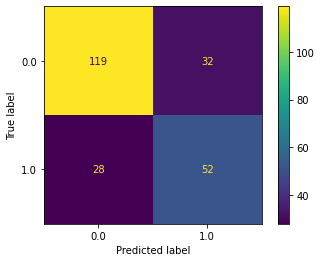

In [ ]:
cm = confusion_matrix(y_test, nb_predict_test, labels=nb_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_model.classes_)

disp.plot()
plt.show()

Relatório detalhado, trazendo outras informações como recall e f1-score.

In [ ]:
print(metrics.classification_report(y_test, nb_predict_test))

              precision    recall  f1-score   support

         0.0       0.81      0.79      0.80       151
         1.0       0.62      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



In [ ]:
metrics.precision_score(y_test, nb_predict_test)

0.6190476190476191

In [ ]:
metrics.accuracy_score(y_test, nb_predict_test)

0.7402597402597403

In [ ]:
metrics.recall_score(y_test, nb_predict_test)

0.65

In [ ]:
metrics.f1_score(y_test, nb_predict_test)

0.6341463414634146

In [ ]:
df.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,155.548223,33.6,0.627,50.0,1.0


In [ ]:
X_test[0]

array([  6.  ,  98.  ,  58.  ,  33.  , 190.  ,  34.  ,   0.43,  43.  ])

Podemos inferir discretamente por um conjunto de valores, sendo que eles devem seguir a mesma ordem do treinamento.

In [ ]:
nb_model.predict([[6., 50., 72., 35., 155., 33., 0.627, 80.]])

array([0.])

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=42)

#### Acurácia dos dados de treinamento

In [ ]:
rf_predict_train = rf_model.predict(X_train)

In [ ]:
metrics.precision_score(y_train, rf_predict_train)

1.0

In [ ]:
metrics.accuracy_score(y_train, rf_predict_train)

1.0

In [ ]:
metrics.recall_score(y_train, rf_predict_train)

1.0

In [ ]:
metrics.f1_score(y_train, rf_predict_train)

1.0

#### Acurácia dos dados de teste

In [ ]:
rf_predict_test = rf_model.predict(X_test)
print("Acurácia: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Acurácia: 0.7489


#### Métricas de avaliação dos dados de teste

Matriz de confusão

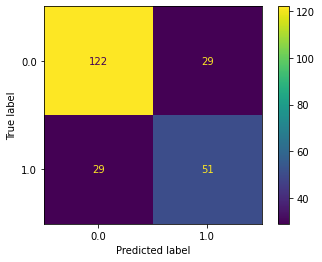

In [ ]:
cm = confusion_matrix(y_test, rf_predict_test, labels=rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)

disp.plot()
plt.show()

Relatório detalhado, trazendo outras informações como recall e f1-score.

In [ ]:
print(metrics.classification_report(y_test, rf_predict_test))

              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81       151
         1.0       0.64      0.64      0.64        80

    accuracy                           0.75       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



In [ ]:
metrics.precision_score(y_test, rf_predict_test)

0.6375

In [ ]:
metrics.accuracy_score(y_test, rf_predict_test)

0.7489177489177489

In [ ]:
metrics.recall_score(y_test, rf_predict_test)

0.6375

In [ ]:
metrics.f1_score(y_test, rf_predict_test)

0.6375

In [ ]:
importances = rf_model.feature_importances_
importances

array([0.07646631, 0.27976354, 0.08123697, 0.07287813, 0.08503482,
       0.15381211, 0.1146928 , 0.13611532])

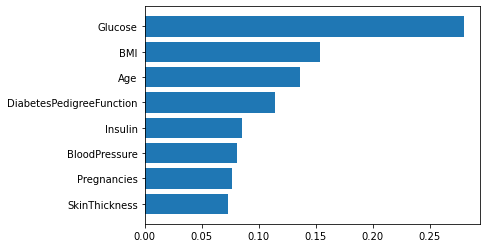

In [ ]:
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(feature_col_names)[indices])